EMG Processing

Data Loading and Windowing

In [5]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [8]:

def extract_windows_for_subjects(subjects, session, channels, window_size=100, overlap=0.5):
   
    windows_dict = {}

    for subject in subjects:
        # Load the dataset
        record_name = f"1dof_preprocess_finger1_sample1"
        record_path = f"hd-semg/1.0.0/1dof_dataset/{subject}_{session}"
        record_emg = wfdb.rdrecord(record_name, pn_dir=record_path)

        # Extract signals for selected channels
        signals = record_emg.p_signal[:, channels]

        # Calculate the number of samples for the given window size and overlap
        window_step = int(window_size * (1 - overlap))
        num_windows = (signals.shape[0] - window_size) // window_step + 1

        # Initialize the 3D array to store windows
        windows = np.zeros((num_windows, window_size, len(channels)))

        # Extract windows
        for i in range(num_windows):
            start = i * window_step
            end = start + window_size
            windows[i, :, :] = signals[start:end, :]

        windows_dict[subject] = windows

    return windows_dict
# subject usage:
selected_subjects = ['subject01', 'subject02']
session_id = 'session1'
selected_channels = [0, 1, 2]  
window_size = 100
overlap = 0.5

extracted_windows_dict = extract_windows_for_subjects(selected_subjects, session_id, selected_channels, window_size, overlap)

# Access windows for each subject
for subject, windows in extracted_windows_dict.items():
    print(f"Subject {subject}: Shape of extracted windows - {windows.shape}")


Subject subject01: Shape of extracted windows - (1023, 100, 3)
Subject subject02: Shape of extracted windows - (1023, 100, 3)


Plotting the three EMG channels from subjects1 and subjects2

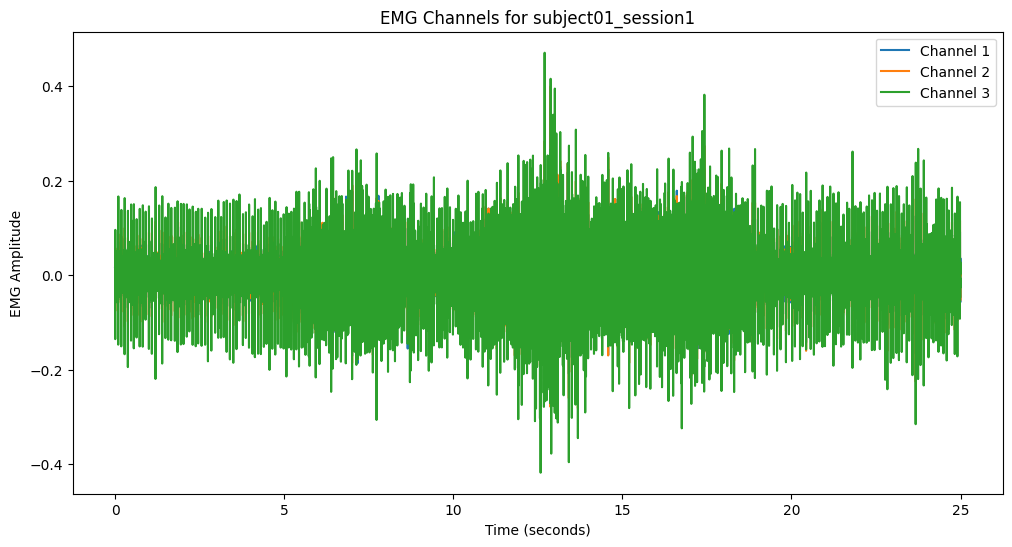

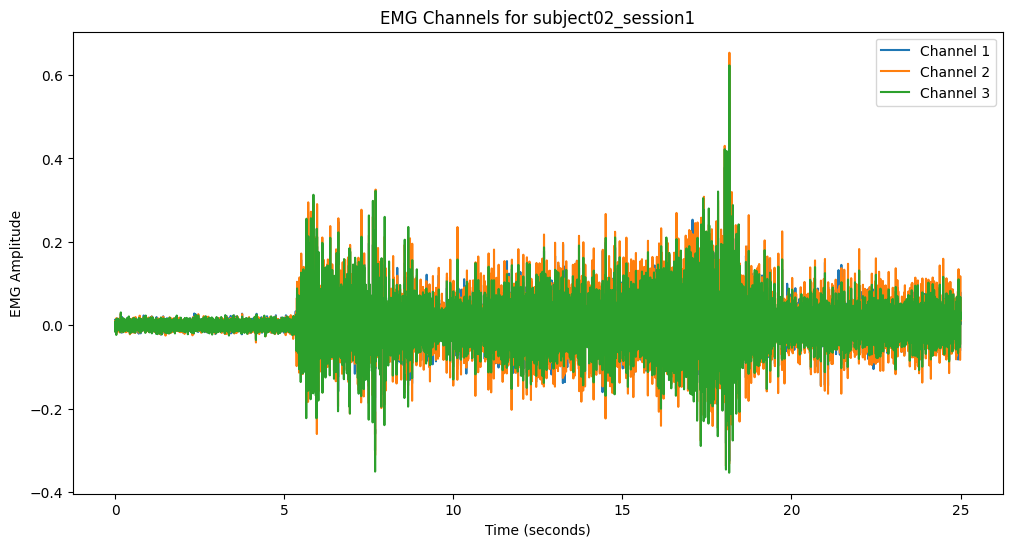

In [ ]:


def plot_emg_channels(subject, session, channels):
    # Load the dataset
    record_name = "1dof_preprocess_finger1_sample1"
    record_path = f"hd-semg/1.0.0/1dof_dataset/{subject}_{session}"
    record_emg = wfdb.rdrecord(record_name, pn_dir=record_path)

    # Extract EMG channels
    emg_channels = record_emg.p_signal[:, channels]

    # Scale the x-axis to seconds
    time_in_seconds = np.arange(emg_channels.shape[0]) / record_emg.fs

    # Plot EMG channels
    plt.figure(figsize=(12, 6))
    plt.plot(time_in_seconds, emg_channels)
    plt.title(f"EMG Channels for {subject}_{session}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("EMG Amplitude")
    plt.legend([f"Channel {i+1}" for i in range(len(channels))])
    plt.show()

# Plot for subject01_session1
plot_emg_channels("subject01", "session1", [0, 1, 2])

# Plot for subject02_session1
plot_emg_channels("subject02", "session1", [0, 1, 2])


Implementing 15 features to plot the feature matrix X for the extracted windows (each feature is computed
for each EMG channel individually).

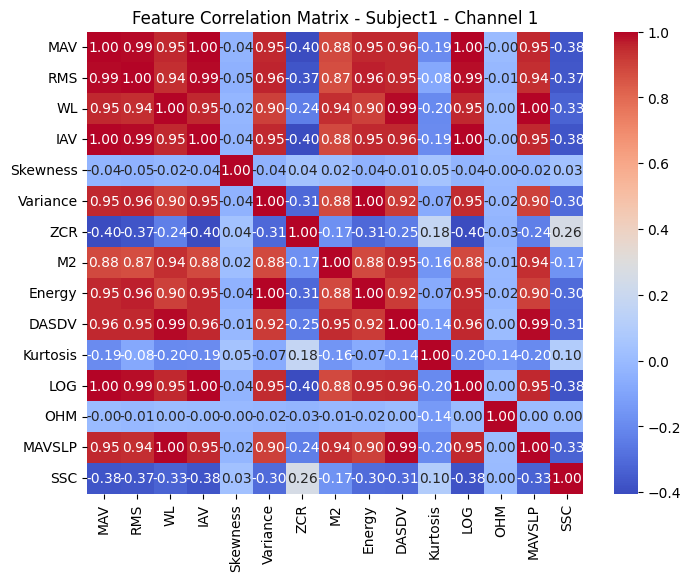


Correlation Matrix - Subject1 - Channel 1:

               MAV       RMS        WL       IAV  Skewness  Variance   
MAV       1.000000  0.989949  0.954685  1.000000 -0.035948  0.951262  \
RMS       0.989949  1.000000  0.942205  0.989949 -0.045761  0.960703   
WL        0.954685  0.942205  1.000000  0.954685 -0.021843  0.902000   
IAV       1.000000  0.989949  0.954685  1.000000 -0.035948  0.951262   
Skewness -0.035948 -0.045761 -0.021843 -0.035948  1.000000 -0.038619   
Variance  0.951262  0.960703  0.902000  0.951262 -0.038619  1.000000   
ZCR      -0.400875 -0.373485 -0.237396 -0.400875  0.038230 -0.313751   
M2        0.882712  0.871708  0.942184  0.882712  0.016913  0.881771   
Energy    0.952217  0.961630  0.902948  0.952217 -0.038721  0.999909   
DASDV     0.955951  0.954394  0.990776  0.955951 -0.011746  0.916754   
Kurtosis -0.191179 -0.083480 -0.197057 -0.191179  0.045126 -0.074727   
LOG       0.999884  0.988879  0.954913  0.999884 -0.035709  0.946469   
OHM      -0.000634 

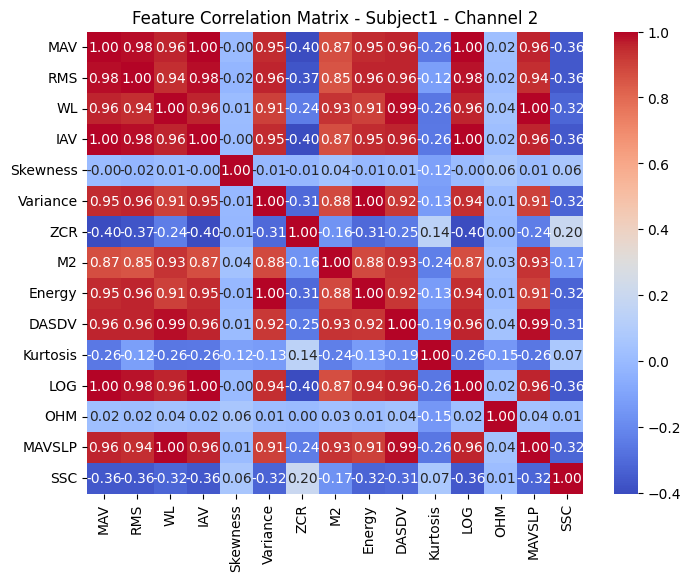


Correlation Matrix - Subject1 - Channel 2:

               MAV       RMS        WL       IAV  Skewness  Variance   
MAV       1.000000  0.984262  0.958783  1.000000 -0.002355  0.945589  \
RMS       0.984262  1.000000  0.941005  0.984262 -0.020861  0.956577   
WL        0.958783  0.941005  1.000000  0.958783  0.007580  0.905260   
IAV       1.000000  0.984262  0.958783  1.000000 -0.002355  0.945589   
Skewness -0.002355 -0.020861  0.007580 -0.002355  1.000000 -0.009503   
Variance  0.945589  0.956577  0.905260  0.945589 -0.009503  1.000000   
ZCR      -0.398722 -0.372303 -0.240486 -0.398722 -0.014571 -0.306641   
M2        0.872994  0.854653  0.933074  0.872994  0.039084  0.880590   
Energy    0.946398  0.957287  0.905984  0.946398 -0.009589  0.999919   
DASDV     0.959005  0.959224  0.989009  0.959005  0.005909  0.922758   
Kurtosis -0.255241 -0.118009 -0.263108 -0.255241 -0.117128 -0.131953   
LOG       0.999846  0.982689  0.958752  0.999846 -0.001929  0.939747   
OHM       0.022378 

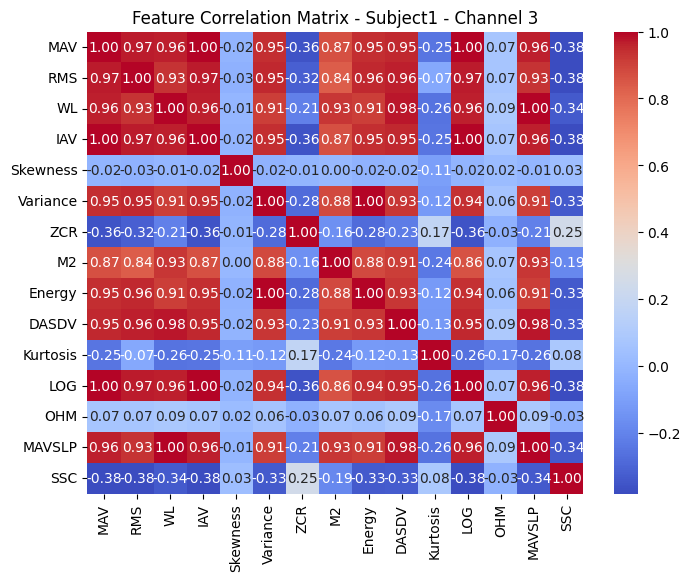


Correlation Matrix - Subject1 - Channel 3:

               MAV       RMS        WL       IAV  Skewness  Variance   
MAV       1.000000  0.972174  0.963666  1.000000 -0.015934  0.945184  \
RMS       0.972174  1.000000  0.933521  0.972174 -0.031066  0.954794   
WL        0.963666  0.933521  1.000000  0.963666 -0.007825  0.910116   
IAV       1.000000  0.972174  0.963666  1.000000 -0.015934  0.945184   
Skewness -0.015934 -0.031066 -0.007825 -0.015934  1.000000 -0.023461   
Variance  0.945184  0.954794  0.910116  0.945184 -0.023461  1.000000   
ZCR      -0.355249 -0.320069 -0.214441 -0.355249 -0.012155 -0.281636   
M2        0.868969  0.835526  0.928631  0.868969  0.002203  0.881329   
Energy    0.945800  0.955161  0.910669  0.945800 -0.023695  0.999935   
DASDV     0.954464  0.964651  0.978174  0.954464 -0.018981  0.927083   
Kurtosis -0.252204 -0.066487 -0.256321 -0.252204 -0.106531 -0.122471   
LOG       0.999744  0.969360  0.963495  0.999744 -0.015300  0.937572   
OHM       0.070372 

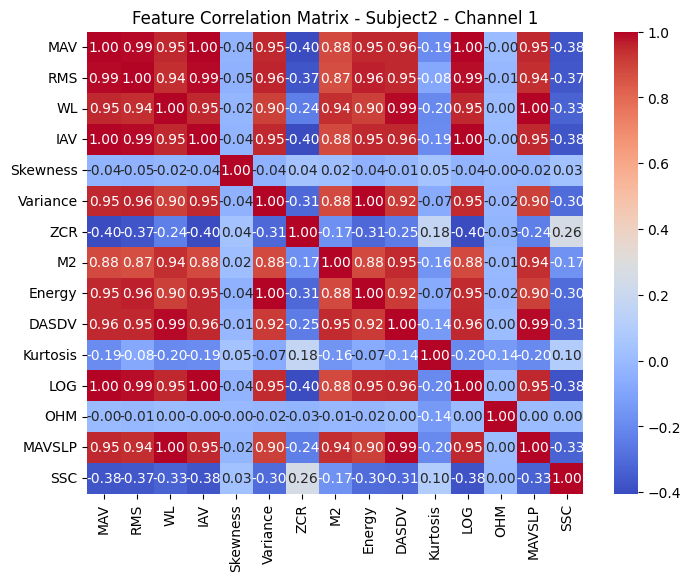


Correlation Matrix - Subject2 - Channel 1:

               MAV       RMS        WL       IAV  Skewness  Variance   
MAV       1.000000  0.989949  0.954685  1.000000 -0.035948  0.951262  \
RMS       0.989949  1.000000  0.942205  0.989949 -0.045761  0.960703   
WL        0.954685  0.942205  1.000000  0.954685 -0.021843  0.902000   
IAV       1.000000  0.989949  0.954685  1.000000 -0.035948  0.951262   
Skewness -0.035948 -0.045761 -0.021843 -0.035948  1.000000 -0.038619   
Variance  0.951262  0.960703  0.902000  0.951262 -0.038619  1.000000   
ZCR      -0.400875 -0.373485 -0.237396 -0.400875  0.038230 -0.313751   
M2        0.882712  0.871708  0.942184  0.882712  0.016913  0.881771   
Energy    0.952217  0.961630  0.902948  0.952217 -0.038721  0.999909   
DASDV     0.955951  0.954394  0.990776  0.955951 -0.011746  0.916754   
Kurtosis -0.191179 -0.083480 -0.197057 -0.191179  0.045126 -0.074727   
LOG       0.999884  0.988879  0.954913  0.999884 -0.035709  0.946469   
OHM      -0.000634 

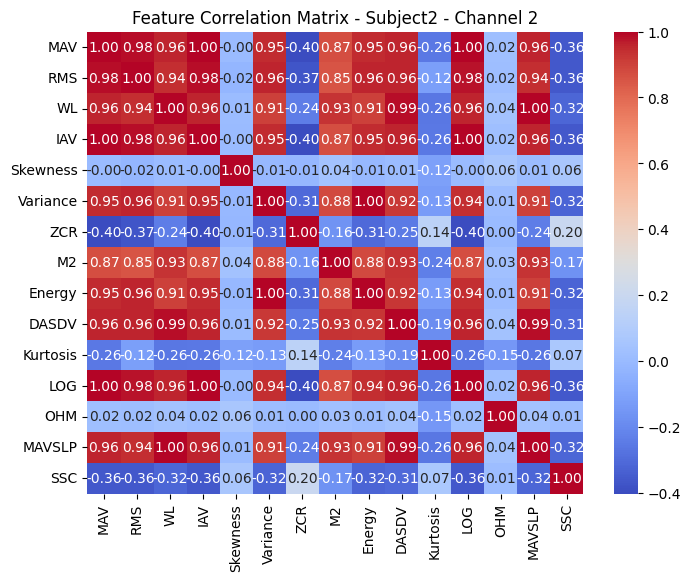


Correlation Matrix - Subject2 - Channel 2:

               MAV       RMS        WL       IAV  Skewness  Variance   
MAV       1.000000  0.984262  0.958783  1.000000 -0.002355  0.945589  \
RMS       0.984262  1.000000  0.941005  0.984262 -0.020861  0.956577   
WL        0.958783  0.941005  1.000000  0.958783  0.007580  0.905260   
IAV       1.000000  0.984262  0.958783  1.000000 -0.002355  0.945589   
Skewness -0.002355 -0.020861  0.007580 -0.002355  1.000000 -0.009503   
Variance  0.945589  0.956577  0.905260  0.945589 -0.009503  1.000000   
ZCR      -0.398722 -0.372303 -0.240486 -0.398722 -0.014571 -0.306641   
M2        0.872994  0.854653  0.933074  0.872994  0.039084  0.880590   
Energy    0.946398  0.957287  0.905984  0.946398 -0.009589  0.999919   
DASDV     0.959005  0.959224  0.989009  0.959005  0.005909  0.922758   
Kurtosis -0.255241 -0.118009 -0.263108 -0.255241 -0.117128 -0.131953   
LOG       0.999846  0.982689  0.958752  0.999846 -0.001929  0.939747   
OHM       0.022378 

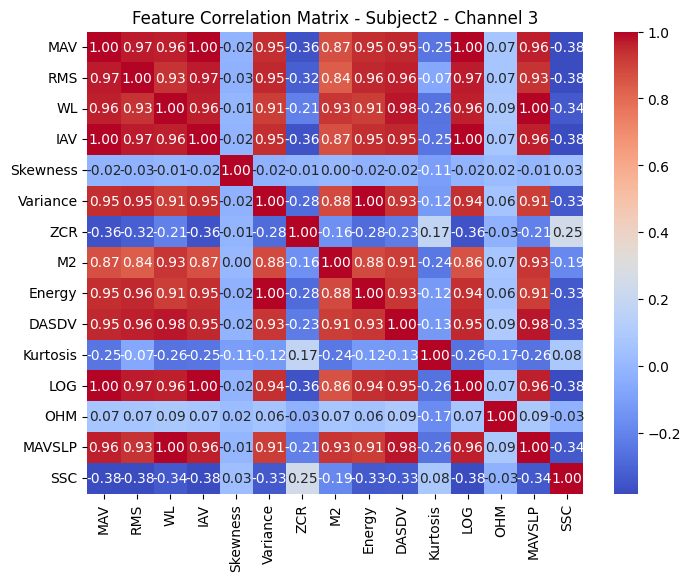


Correlation Matrix - Subject2 - Channel 3:

               MAV       RMS        WL       IAV  Skewness  Variance   
MAV       1.000000  0.972174  0.963666  1.000000 -0.015934  0.945184  \
RMS       0.972174  1.000000  0.933521  0.972174 -0.031066  0.954794   
WL        0.963666  0.933521  1.000000  0.963666 -0.007825  0.910116   
IAV       1.000000  0.972174  0.963666  1.000000 -0.015934  0.945184   
Skewness -0.015934 -0.031066 -0.007825 -0.015934  1.000000 -0.023461   
Variance  0.945184  0.954794  0.910116  0.945184 -0.023461  1.000000   
ZCR      -0.355249 -0.320069 -0.214441 -0.355249 -0.012155 -0.281636   
M2        0.868969  0.835526  0.928631  0.868969  0.002203  0.881329   
Energy    0.945800  0.955161  0.910669  0.945800 -0.023695  0.999935   
DASDV     0.954464  0.964651  0.978174  0.954464 -0.018981  0.927083   
Kurtosis -0.252204 -0.066487 -0.256321 -0.252204 -0.106531 -0.122471   
LOG       0.999744  0.969360  0.963495  0.999744 -0.015300  0.937572   
OHM       0.070372 

In [ ]:

# Feature names
feature_names = ['MAV', 'RMS', 'WL', 'IAV', 'Skewness', 'Variance', 'ZCR', 'M2', 'Energy', 'DASDV', 'Kurtosis', 'LOG', 'OHM', 'MAVSLP', 'SSC']

# Assuming 'extracted_windows_dict' contains the windows for each subject
subject1_windows = extracted_windows_dict['subject01']
subject2_windows = extracted_windows_dict['subject02']

# Define a function to calculate features for each channel
def calculate_channel_features(window):
    features = []

    # Features
    mav = np.mean(np.abs(window))
    rms = np.sqrt(np.mean(window**2))
    wl = np.sum(np.abs(np.diff(window)))
    iav = np.sum(np.abs(window))
    skewness = np.mean(((window - np.mean(window)) / np.std(window))**3)
    variance = np.var(window)
    zcr = np.sum(np.diff(np.sign(window)) != 0) / (len(window) - 1)
    m2 = np.mean(np.diff(window, 2)**2)
    energy = np.sum(window**2)    
    dasdv = np.sqrt(np.mean(np.diff(window)**2))
    kurt = np.mean(((window - np.mean(window)) / np.std(window))**4)
    log_detector = np.sum(np.log(np.abs(window) + 1))
    ohm = np.sum(np.abs(np.diff(np.angle(np.fft.fft(window)))))
    mavslp = np.mean(np.abs(np.diff(window)))
    ssc = np.sum(np.diff(np.sign(np.diff(window))) != 0)
    ssi = np.sum(window**2)
    tm = np.sum(np.abs(np.diff(window))**2)

    # Selecting 15 features
    features.extend([mav, rms, wl, iav, skewness, variance, zcr, m2, energy, dasdv, kurt, log_detector, ohm, mavslp, ssc])

    return features

# Calculate feature matrix for each EMG channel
num_channels = subject1_windows.shape[2]  
feature_matrices_subject1 = [np.array([calculate_channel_features(window[:, i]) for window in subject1_windows]) for i in range(num_channels)]
feature_matrices_subject2 = [np.array([calculate_channel_features(window[:, i]) for window in subject2_windows]) for i in range(num_channels)]

# Convert feature matrices to pandas DataFrames with actual feature names
feature_df_subject1 = [pd.DataFrame(matrix, columns=feature_names) for matrix in feature_matrices_subject1]
feature_df_subject2 = [pd.DataFrame(matrix, columns=feature_names) for matrix in feature_matrices_subject2]

# Compute feature correlation matrices
correlation_matrix_subject1 = [df.corr() for df in feature_df_subject1]
correlation_matrix_subject2 = [df.corr() for df in feature_df_subject2]

# Plot correlation matrices and print them for all channels of subject1
num_channels = subject1_windows.shape[2]

for channel in range(num_channels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_subject1[channel], annot=True, cmap='coolwarm', fmt=".2f", xticklabels=True, yticklabels=True)
    plt.title(f"Feature Correlation Matrix - Subject1 - Channel {channel + 1}")
    plt.show()

    

#Plot correlation matrices and print them for all channels of subject2
num_channels = subject2_windows.shape[2]

for channel in range(num_channels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_subject1[channel], annot=True, cmap='coolwarm', fmt=".2f", xticklabels=True, yticklabels=True)
    plt.title(f"Feature Correlation Matrix - Subject2 - Channel {channel + 1}")
    plt.show()

    


CONCLUSION

 from the above analysis
 i would use MAV, RMS, IAV, Variance, MAVSLP, M2, Energy, DASDV and LOG features because they consistently show strong positive correlation across channels and subjects.